Win/Loss Ratio:
Wins: 7, Losses: 13, Total: 20
Win Rate: 35.00%


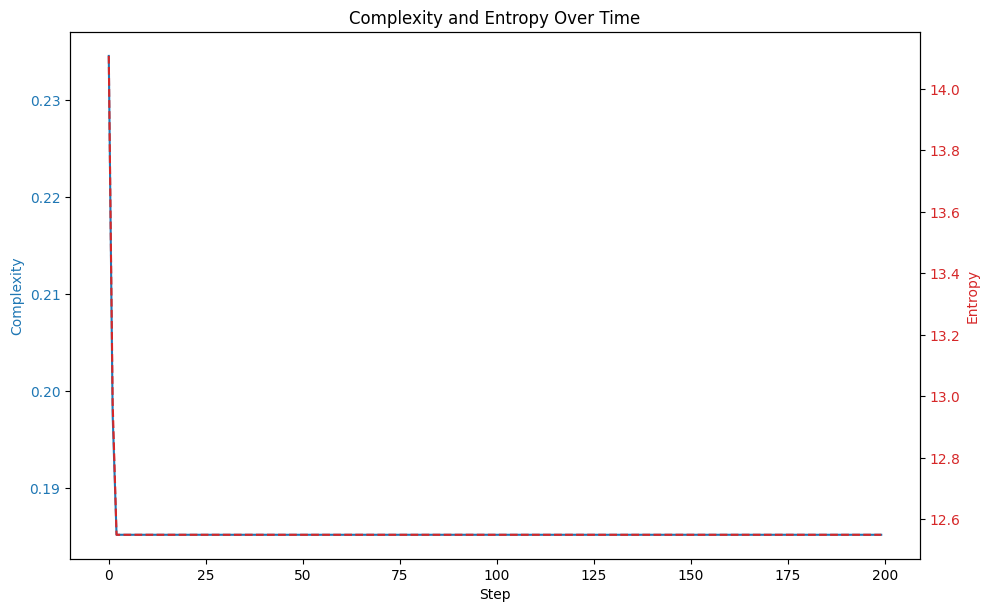

Entropy at start: 14.11
Entropy at end: 12.55
Entropy decreased over time, indicating increased certainty.


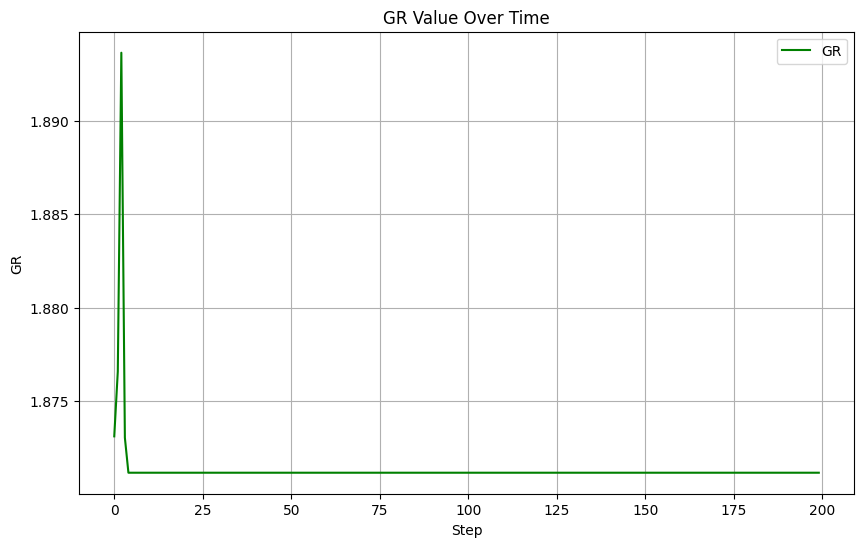

No large sudden GR changes detected.

Summary Statistics:
   Initial_Complexity  Final_Complexity  Initial_Entropy  Final_Entropy  \
0            0.234568          0.185185        14.107264      12.549611   

    Mean_GR    Max_GR    Min_GR  
0  1.871336  1.893632  1.871177  


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

if not os.path.exists("gr_metrics.csv"):
    raise FileNotFoundError("gr_metrics.csv not found. Run simulations first.")

df = pd.read_csv("gr_metrics.csv")

results_data = {
    'Game_ID': range(1, 21),
    'Result': ['Win']*7 + ['Lose']*13
}
results_df = pd.DataFrame(results_data)

win_count = (results_df['Result'] == 'Win').sum()
lose_count = (results_df['Result'] == 'Lose').sum()
total_games = len(results_df)
win_ratio = win_count / total_games

print(f"Win/Loss Ratio:")
print(f"Wins: {win_count}, Losses: {lose_count}, Total: {total_games}")
print(f"Win Rate: {win_ratio*100:.2f}%")


fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Step')
ax1.set_ylabel('Complexity', color=color)
ax1.plot(df['Step'], df['Complexity'], color=color, label='Complexity')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Entropy', color=color)
ax2.plot(df['Step'], df['Entropy'], color=color, linestyle='--', label='Entropy')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title("Complexity and Entropy Over Time")
plt.show()

entropy_start = df['Entropy'].iloc[0]
entropy_end = df['Entropy'].iloc[-1]
print(f"Entropy at start: {entropy_start:.2f}")
print(f"Entropy at end: {entropy_end:.2f}")
if entropy_end < entropy_start:
    print("Entropy decreased over time, indicating increased certainty.")
else:
    print("Entropy did not decrease as expected, needs further analysis.")

plt.figure(figsize=(10,6))
plt.plot(df['Step'], df['GR'], label='GR', color='green')
plt.title("GR Value Over Time")
plt.xlabel("Step")
plt.ylabel("GR")
plt.grid(True)
plt.legend()
plt.show()

# Check for sudden changes in GR:
# A simple heuristic: Compute differences between consecutive GR values.
gr_diff = df['GR'].diff().fillna(0)
large_changes = gr_diff.abs() > (df['GR'].mean()*0.5) # arbitrary threshold
significant_changes = df[large_changes]

if not significant_changes.empty:
    print("Significant GR changes at steps:")
    print(significant_changes[['Step', 'GR']])
else:
    print("No large sudden GR changes detected.")

# ## Additional Summary Tables
#
# Create a small summary table of average complexity, final complexity, 
# average entropy, etc.

summary = {
    'Initial_Complexity': df['Complexity'].iloc[0],
    'Final_Complexity': df['Complexity'].iloc[-1],
    'Initial_Entropy': df['Entropy'].iloc[0],
    'Final_Entropy': df['Entropy'].iloc[-1],
    'Mean_GR': df['GR'].mean(),
    'Max_GR': df['GR'].max(),
    'Min_GR': df['GR'].min()
}

summary_df = pd.DataFrame([summary])
print("\nSummary Statistics:")
print(summary_df)
